Files already downloaded and verified


/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


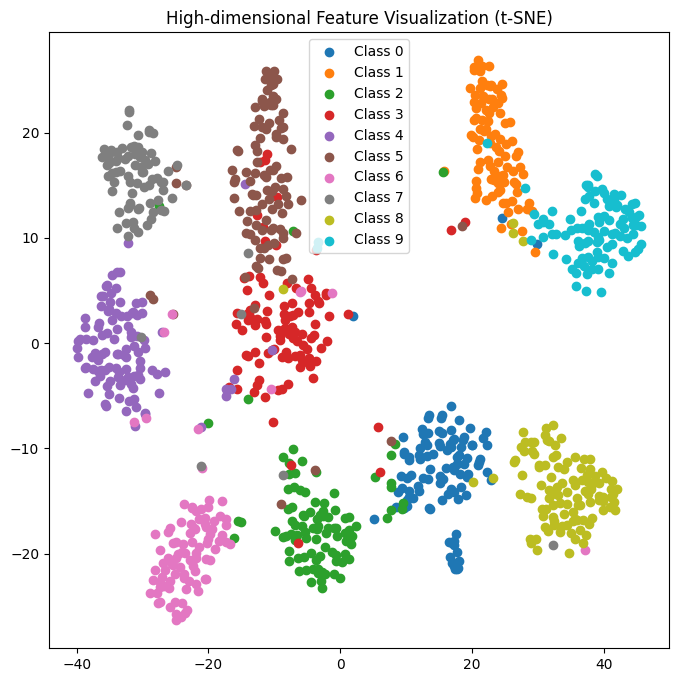

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet18
import torch.nn as nn

# 加载 CIFAR-10 数据集
def load_cifar10(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    return trainloader

# 可视化高维特征
def visualize_high_dimensional_features(features, labels):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    plt.figure(figsize=(8, 8))
    num_classes = len(np.unique(labels))
    for class_idx in range(num_classes):
        indices = labels == class_idx
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=f'Class {class_idx}')
    plt.legend()
    plt.title("High-dimensional Feature Visualization (t-SNE)")
    plt.show()

# 提取 ResNet18 的倒数第二层特征
def extract_resnet18_features(model, dataloader, num_samples=1000, device='cuda:0'):
    model = model.to(device)
    model.eval()
    features = []
    labels = []
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
            labels.append(targets.numpy())
            total_samples += inputs.size(0)
            if total_samples >= num_samples:
                break  # 只提取指定数量的样本
    return np.concatenate(features, axis=0)[:num_samples], np.concatenate(labels, axis=0)[:num_samples]

# 主程序

# 加载数据
trainloader = load_cifar10(batch_size=64)

# 加载本地的 ResNet18 参数
model = resnet18(pretrained=False)  # 不加载预训练参数
model.fc = nn.Linear(512, 10)  # 替换最后一层为 10 类
model.load_state_dict(torch.load('./resnet18_cifar10.pth'))
model.fc = torch.nn.Identity()  # 移除最后一层全连接层

# 提取高维特征（1000 个样本）
features, labels = extract_resnet18_features(model, trainloader, num_samples=1000)

# 可视化高维特征
visualize_high_dimensional_features(features, labels)